In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patchify

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Check which GPU is being used
print("GPU Device:", tf.test.gpu_device_name())

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Device: /device:GPU:0


In [ ]:
!pip install tensorflow

In [ ]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils import tf_utils
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
import os
target_shape = (224, 224)  # Replace with your desired shape

In [ ]:
# !pip install split-folders

In [ ]:
# import splitfolders
# splitfolders.ratio("/Users/shubhamsharma/tensorflow-test/pneunomia1.2_smalldataset/dvntn9yhd2-1/Covid19-Pneumonia-Normal Chest X-Ray Images Dataset", output="/Users/shubhamsharma/tensorflow-test/pneunomia1.2_smalldataset/dvntn9yhd2-1/output_data",
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

In [ ]:
X_train = []
y_train = []

os.chdir('/content/drive/MyDrive/output_data/train/COVID')
select1 = os.listdir()
for i in tqdm(select1):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_train.append(img)
      y_train.append(('CO'))


os.chdir('/content/drive/MyDrive/output_data/train/NORMAL')
select2 = os.listdir()
for i in tqdm(select2):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_train.append(img)
      y_train.append(('NO'))


os.chdir('/content/drive/MyDrive/output_data/train/PNEUMONIA')
select3 = os.listdir()
for i in tqdm(select3):
      if(i=='training_1'or i=='accuracy.svg' or i=='loss.svg'):
        print(i)
        continue
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_train.append(img)
      y_train.append(('PN'))

  0%|          | 0/1300 [00:00<?, ?it/s]

  0%|          | 0/1441 [00:00<?, ?it/s]

  0%|          | 0/1442 [00:00<?, ?it/s]

accuracy.svg
loss.svg


In [ ]:
from PIL import Image
X_test = []
y_test = []

os.chdir('/content/drive/MyDrive/output_data/test/COVID')
sel1 = os.listdir()
for i in tqdm(sel1):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_test.append(img)
      y_test.append(('CO'))


os.chdir('/content/drive/MyDrive/output_data/test/NORMAL')
sel2 = os.listdir()
for i in tqdm(sel2):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_test.append(img)
      y_test.append(('NO'))


os.chdir('/content/drive/MyDrive/output_data/test/PNEUMONIA')
sel3 = os.listdir()
for i in tqdm(sel3):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape, interpolation=cv2.INTER_AREA)
      X_test.append(img)
      y_test.append(('PN'))

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
X_val = []
y_val = []

os.chdir('/content/drive/MyDrive/output_data/val/COVID')
sel1 = os.listdir()
for i in tqdm(sel1):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_val.append(img)
      y_val.append(('CO'))


os.chdir('/content/drive/MyDrive/output_data/val/NORMAL')
sel2 = os.listdir()
for i in tqdm(sel2):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_val.append(img)
      y_val.append(('NO'))


os.chdir('/content/drive/MyDrive/output_data/val/PNEUMONIA')
sel3 = os.listdir()
for i in tqdm(sel3):
      img = cv2.imread(i)
      img = cv2.resize(img, target_shape)
      X_val.append(img)
      y_val.append(('PN'))

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/output_data/train/PNEUMONIA')))

1442


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

4181
4181
522
522
525
525


In [ ]:
num_classes = 3
input_shape = (224, 224, 3)

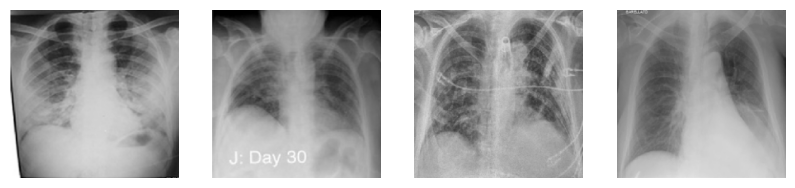

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
print(len(y_test))
print(y_test[0:10])

525
['CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO']


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)


In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [ ]:
np.unique(y_train)

array([0, 1, 2])

In [ ]:
y_train.shape

(4181,)

In [ ]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train.shape

(4181, 224, 224, 3)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_test = np.array(X_test, dtype=np.uint8)
X_test.dtype

dtype('uint8')

In [ ]:
X_test.shape

(525, 224, 224, 3)

In [ ]:
X_val = np.array(X_val, dtype=np.uint8)
X_val.dtype

dtype('uint8')

In [ ]:
y_train = np.reshape(y_train, (-1, 1))
print(y_train.dtype)
y_test = np.reshape(y_test, (-1,1))
print(y_test.dtype)
y_val = np.reshape(y_val, (-1,1))
print(y_val.dtype)


int64
int64
int64


In [ ]:
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")
print(f"x_val shape: {X_val.shape} - y_test shape: {y_val.shape}")


x_train shape: (4181, 224, 224, 3) - y_train shape: (4181, 1)
x_test shape: (525, 224, 224, 3) - y_test shape: (525, 1)
x_val shape: (522, 224, 224, 3) - y_test shape: (522, 1)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


In [ ]:
y_test.dtype

dtype('float32')

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_val

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
learning_rate = 0.0001
weight_decay = 0.0001
batch_size = 8
num_epochs = 120
image_size = 224  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 6 X 6
Patches per image: 1369
Elements per patch: 108


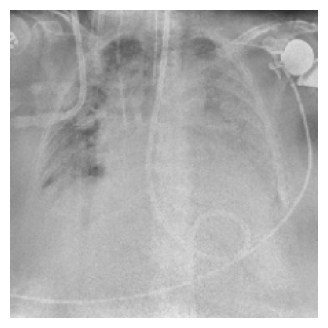

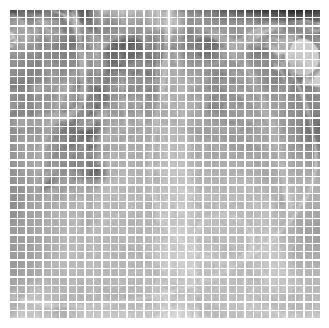

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])


    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(3, activation="softmax")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from keras.callbacks import ModelCheckpoint

def run_experiment(model):
    optimizer =

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["acc"]
    )

    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1,
                                                      monitor="val_accuracy",
                                                      save_best_only=True
                                                     )


    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        # validation_split = 0.1,
        validation_data = (X_val, y_val),
        callbacks=[cp_callback],
    )

    model.save('shubham_with_attention_500_1.2.tf')
    return history


vit_classifier = create_vit_classifier()
mod = run_experiment(vit_classifier)

In [ ]:
!pip install tensorflow_hub
import tensorflow_hub as hub

In [ ]:
vit_classifier.summary()

In [ ]:
print(mod.history.keys())

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(mod.history['acc'])
plt.plot(mod.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

from google.colab import files
plt.savefig("accuracy.svg")
files.download("accuracy.svg")

In [ ]:
# summarize history for loss

plt.subplot(212)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
from google.colab import files
plt.savefig("loss.svg")
files.download("loss.svg")

In [ ]:
from keras.models import load_model
my_reloaded_model = tf.keras.models.load_model(
       ("/content/drive/MyDrive/output_data/ModelPaths/5th_vit.tf"))

In [ ]:
my_reloaded_model.summary()

In [ ]:
my_reloaded_model.evaluate(X_test,y_test)

In [ ]:
y_pred = my_reloaded_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
# y_pred = (y_pred > 0.5)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

y_test2 = np.array(list_test)

In [ ]:
y_test2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred,digits=10))

              precision    recall  f1-score   support

           0  0.9700598802 0.9878048780 0.9788519637       164
           1  0.9714285714 0.9392265193 0.9550561798       181
           2  0.9344262295 0.9500000000 0.9421487603       180

    accuracy                      0.9580952381       525
   macro avg  0.9586382271 0.9590104658 0.9586856346       525
weighted avg  0.9583145011 0.9580952381 0.9580641285       525



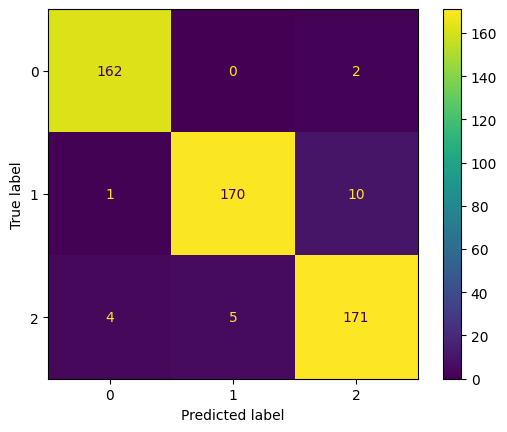

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test2, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

from google.colab import files
plt.savefig("confusion.svg")
files.download("confusion.svg")

In [ ]:
# import shutil
# colab_link = "/content/drive/MyDrive/output_data/train/PNEUMONIA/shubham_with_attention_500.tf"
# gdrive_link = "/content/drive/MyDrive/output_data/"
# shutil.copy(colab_link, gdrive_link)

In [ ]:
from keras.models import Model, Sequential
feature = Model(inputs=my_reloaded_model.input, outputs=my_reloaded_model.output)

In [ ]:
feature_vit=feature

In [ ]:
out_vit_feature_train_2048 = feature.predict(X_train)

131/131 [==============================] - 83s 607ms/step


In [ ]:
out_vit_feature_train_2048.shape

(4181, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/2048_train_vit_attention.npy', out_vit_feature_train_2048)

In [ ]:
out_vit_feature_test_2048 = feature.predict(X_test)

17/17 [==============================] - 9s 554ms/step


In [ ]:
out_vit_feature_test_2048.shape

(525, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/2048_test_vit_attention.npy', out_vit_feature_test_2048)

In [ ]:
out_vit_feature_val_2048 = feature_vit.predict(X_val)

17/17 [==============================] - 10s 556ms/step


In [ ]:
out_vit_feature_val_2048.shape

(522, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/2048_val_vit_attention.npy', out_vit_feature_val_2048)

# Resnet50

In [ ]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow as tf

In [ ]:
# Expand the size of dataset with new transformed images from the original dataset using ImageDataGenerator.
train_datagen = image.ImageDataGenerator(
                  featurewise_center=False,
                  rotation_range=5,
                  fill_mode='nearest',
                  horizontal_flip=True,
                  vertical_flip=True,
                  brightness_range=[0.5,1.3],
                  rescale = 1./255,
                  channel_shift_range = 1.0
                  )
val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory= "/content/drive/MyDrive/output_data/train",
    target_size=(224,224),
    batch_size=8,
    class_mode = 'categorical')

Found 4181 images belonging to 3 classes.


In [ ]:
val_data = val_datagen.flow_from_directory(
    directory= "/content/drive/MyDrive/output_data/val",
    target_size=(224,224),
    batch_size=8,
    class_mode = 'categorical')

Found 522 images belonging to 3 classes.


In [ ]:
val_data.class_indices

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
test_data = test_datagen.flow_from_directory(directory= "/content/drive/MyDrive/output_data/test",
                                             target_size=(224, 224),
                                             batch_size=8,
                                             class_mode = 'categorical')

Found 525 images belonging to 3 classes.


In [ ]:
IMG_SHAPE=(224,224,3)
resnet=tf.keras.applications.resnet50.ResNet50(include_top=False,weights='imagenet',input_shape=IMG_SHAPE)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
epochs = 120
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/output_data/resnet_224.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
]

In [ ]:
from keras.models import Model

In [ ]:
def create_model_Densenet(model_name):
  models = { "resnet" : resnet }
  model = models[model_name]
  for layer in model.layers:
    layer.trainable = True
  # x = tf.keras.layers.Flatten()(model.output)
  x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
  x= tf.keras.layers.Dense(3,activation='softmax')(x)
  model = Model(inputs= model.input, outputs=x)
  my_model = tf.keras.models.clone_model(model)
  return my_model
# model = tf.keras.Model(feature_extractor_model.input, x)
model=create_model_Densenet('resnet')

In [ ]:
resnet=model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
resnet.compile( optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=resnet.fit(x = train_data,epochs=120,validation_data=val_data,verbose=1,callbacks=my_callbacks,shuffle=True)

In [ ]:
resnet.evaluate(test_data)

In [ ]:
model_resnet = tf.keras.models.load_model('/content/drive/MyDrive/output_data/2nd_resnet50_224.h5')

In [ ]:
from keras.models import Model, Sequential
feature_cnn = Model(inputs=model_resnet.input, outputs=model_resnet.get_layer("global_average_pooling2d").output)

In [ ]:
out_resnet_feature_train = feature_cnn.predict(X_train)

131/131 [==============================] - 11s 88ms/step


In [ ]:
out_resnet_feature_train.shape

(4181, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/train_2nd_resnet_pred.npy', out_feature_train)

In [ ]:
out_resnet_feature_test = feature_cnn.predict(X_test)

17/17 [==============================] - 1s 91ms/step


In [ ]:
out_resnet_feature_test.shape

(525, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/test_2nd_resnet_pred.npy', out_feature_test)

In [ ]:
out_resnet_feature_val = feature_cnn.predict(X_val)

17/17 [==============================] - 2s 91ms/step


In [ ]:
out_resnet_feature_val.shape

(522, 2048)

In [ ]:
import numpy as np

# the array is saved in the file geekfile.npy
np.save('/content/drive/MyDrive/output_data/Model_predictions/val_2nd_resnet_pred.npy', out_feature_val)

DenseNet

# VIT(256) + ResNet(256)


VIT_feature_transform

In [ ]:
import numpy as np

In [ ]:
out_vit_feature_train.shape

NameError: ignored

In [ ]:
out_vit_feature_test.shape

NameError: ignored

In [ ]:
out_vit_feature_val.shape

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 256)

In [ ]:
pca.fit(out_vit_feature_train) #last layer of vit

PCA(n_components=256)

In [ ]:
PCA_out_features_vit_train = pca.transform(out_vit_feature_train)

In [ ]:
PCA_out_features_vit_train.shape

(4181, 256)

In [ ]:
pca.fit(out_vit_feature_test)

PCA(n_components=256)

In [ ]:
PCA_out_features_vit_test = pca.transform(out_vit_feature_test)

In [ ]:
PCA_out_features_vit_test.shape

(525, 256)

In [ ]:
pca.fit(out_vit_feature_val)
PCA_out_features_vit_val = pca.transform(out_vit_feature_val)

In [ ]:
PCA_out_features_vit_val.shape

(522, 256)

ResNet50

In [ ]:
out_resnet_feature_train.shape

(4181, 2048)

In [ ]:
out_resnet_feature_test.shape

(525, 2048)

In [ ]:
pca.fit(out_resnet_feature_train)

PCA(n_components=256)

In [ ]:
PCA_out_features_resnet_train = pca.transform(out_resnet_feature_train)

In [ ]:
PCA_out_features_resnet_train.shape

(4181, 256)

In [ ]:
pca.fit(out_resnet_feature_test)

PCA(n_components=256)

In [ ]:
PCA_out_features_resnet_test = pca.transform(out_resnet_feature_test)

In [ ]:
PCA_out_features_resnet_test.shape

(525, 256)

In [ ]:
out_resnet_feature_val.shape

(522, 2048)

In [ ]:
pca.fit(out_resnet_feature_val)

PCA(n_components=256)

In [ ]:
PCA_out_features_resnet_val = pca.transform(out_resnet_feature_val)

In [ ]:
PCA_out_features_resnet_val.shape

(522, 256)

In [ ]:
stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

In [ ]:
stack_array_train.shape

(4181, 512)

In [ ]:
stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

In [ ]:
stack_array_test.shape

(525, 512)

In [ ]:
stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)

In [ ]:
stack_array_val.shape

(522, 512)

In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

In [ ]:
y_train2 = np.array(list_train)

In [ ]:
list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

In [ ]:
y_test2 = np.array(list_test)

In [ ]:
list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

In [ ]:
y_val2 = np.array(list_val)

In [ ]:
print(y_val2.shape)
print(y_train2.shape)
print(y_test2.shape)

(522,)
(4181,)
(525,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
stack_array_test.shape
print(np.unique(stack_array_test))

[-2929.1348 -2764.0054 -2637.4004 ...  3720.9807  3793.332   4448.078 ]


In [ ]:
clf.fit(stack_array_train, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(stack_array_test)

In [ ]:
print(y_pred.shape)
print(y_test2.shape)

(525,)
(525,)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,

In [ ]:
print(y_val2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9238095238095239

In [ ]:
y_pred = clf.predict(stack_array_val)

In [ ]:
print(y_pred.shape)
print(y_val2.shape)

(522,)
(522,)


In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9080459770114943

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=1)

In [ ]:
lsvc.fit(stack_array_train, y_train2)

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=1)

In [ ]:
y_pred = lsvc.predict(stack_array_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.8723809523809524

In [ ]:
y_pred = lsvc.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.7969348659003831

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(stack_array_train, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.940952380952381

In [ ]:
y_pred = model.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9137931034482759

# VIT(128)+ResNet(384)

VIT_feature_transform

In [ ]:
import numpy as np

In [ ]:
out_vit_feature_train.shape

(4181, 2048)

In [ ]:
out_vit_feature_test.shape

(525, 2048)

In [ ]:
out_vit_feature_val.shape

(522, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 128)

In [ ]:
pca.fit(out_vit_feature_train)

PCA(n_components=128)

In [ ]:
PCA_out_features_vit_train = pca.transform(out_vit_feature_train)

In [ ]:
PCA_out_features_vit_train.shape

(4181, 128)

In [ ]:
pca.fit(out_vit_feature_test)

PCA(n_components=128)

In [ ]:
PCA_out_features_vit_test = pca.transform(out_vit_feature_test)

In [ ]:
PCA_out_features_vit_test.shape

(525, 128)

In [ ]:
pca.fit(out_vit_feature_val)
PCA_out_features_vit_val = pca.transform(out_vit_feature_val)

In [ ]:
PCA_out_features_vit_val.shape

(522, 128)

ResNet50

In [ ]:
out_resnet_feature_train.shape

(4181, 2048)

In [ ]:
out_resnet_feature_test.shape

(525, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 384)

In [ ]:
pca.fit(out_resnet_feature_train)

PCA(n_components=384)

In [ ]:
PCA_out_features_resnet_train = pca.transform(out_resnet_feature_train)

In [ ]:
PCA_out_features_resnet_train.shape

(4181, 384)

In [ ]:
pca.fit(out_resnet_feature_test)

PCA(n_components=384)

In [ ]:
PCA_out_features_resnet_test = pca.transform(out_resnet_feature_test)

In [ ]:
PCA_out_features_resnet_test.shape

(525, 384)

In [ ]:
out_resnet_feature_val.shape

(522, 2048)

In [ ]:
pca.fit(out_resnet_feature_val)

PCA(n_components=384)

In [ ]:
PCA_out_features_resnet_val = pca.transform(out_resnet_feature_val)

In [ ]:
PCA_out_features_resnet_val.shape

(522, 384)

In [ ]:
stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

In [ ]:
stack_array_train.shape

(4181, 512)

In [ ]:
stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

In [ ]:
stack_array_test.shape

(525, 512)

In [ ]:
stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)

In [ ]:
stack_array_val.shape

(522, 512)

In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

In [ ]:
y_train2 = np.array(list_train)

In [ ]:
list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

In [ ]:
y_test2 = np.array(list_test)

In [ ]:
list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

In [ ]:
y_val2 = np.array(list_val)

In [ ]:
print(y_val2.shape)
print(y_train2.shape)
print(y_test2.shape)

(522,)
(4181,)
(525,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
stack_array_test.shape
print(np.unique(stack_array_test))

[-2929.1345 -2764.005  -2637.4001 ...  3720.9807  3793.332   4448.078 ]


In [ ]:
clf.fit(stack_array_train, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(stack_array_test)

In [ ]:
print(y_pred.shape)
print(y_test2.shape)

(525,)
(525,)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,

In [ ]:
print(y_val2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9276190476190476

In [ ]:
y_pred = clf.predict(stack_array_val)

In [ ]:
print(y_pred.shape)
print(y_val2.shape)

(522,)
(522,)


In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9195402298850575

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=1)

In [ ]:
lsvc.fit(stack_array_train, y_train2)

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=1)

In [ ]:
y_pred = lsvc.predict(stack_array_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.8742857142857143

In [ ]:
y_pred = lsvc.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.7547892720306514

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(stack_array_train, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9447619047619048

In [ ]:
y_pred = model.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9137931034482759

# ViT(64)+ResNet(448)

VIT_feature_transform

In [ ]:
import numpy as np

In [ ]:
out_vit_feature_train.shape

(4181, 2048)

In [ ]:
out_vit_feature_test.shape

(525, 2048)

In [ ]:
out_vit_feature_val.shape

(522, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 64)

In [ ]:
pca.fit(out_vit_feature_train)

PCA(n_components=64)

In [ ]:
PCA_out_features_vit_train = pca.transform(out_vit_feature_train)

In [ ]:
PCA_out_features_vit_train.shape

(4181, 64)

In [ ]:
pca.fit(out_vit_feature_test)

PCA(n_components=64)

In [ ]:
PCA_out_features_vit_test = pca.transform(out_vit_feature_test)

In [ ]:
PCA_out_features_vit_test.shape

(525, 64)

In [ ]:
pca.fit(out_vit_feature_val)
PCA_out_features_vit_val = pca.transform(out_vit_feature_val)

In [ ]:
PCA_out_features_vit_val.shape

(522, 64)

ResNet50

In [ ]:
out_resnet_feature_train.shape

(4181, 2048)

In [ ]:
out_resnet_feature_test.shape

(525, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 448)

In [ ]:
pca.fit(out_resnet_feature_train)

PCA(n_components=448)

In [ ]:
PCA_out_features_resnet_train = pca.transform(out_resnet_feature_train)

In [ ]:
PCA_out_features_resnet_train.shape

(4181, 448)

In [ ]:
pca.fit(out_resnet_feature_test)

PCA(n_components=448)

In [ ]:
PCA_out_features_resnet_test = pca.transform(out_resnet_feature_test)

In [ ]:
PCA_out_features_resnet_test.shape

(525, 448)

In [ ]:
out_resnet_feature_val.shape

(522, 2048)

In [ ]:
pca.fit(out_resnet_feature_val)

PCA(n_components=448)

In [ ]:
PCA_out_features_resnet_val = pca.transform(out_resnet_feature_val)

In [ ]:
PCA_out_features_resnet_val.shape

(522, 448)

In [ ]:
stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

In [ ]:
stack_array_train.shape

(4181, 512)

In [ ]:
stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

In [ ]:
stack_array_test.shape

(525, 512)

In [ ]:
stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)

In [ ]:
stack_array_val.shape

(522, 512)

In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

In [ ]:
y_train2 = np.array(list_train)

In [ ]:
list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

In [ ]:
y_test2 = np.array(list_test)

In [ ]:
list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

In [ ]:
y_val2 = np.array(list_val)

In [ ]:
print(y_val2.shape)
print(y_train2.shape)
print(y_test2.shape)

(522,)
(4181,)
(525,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
stack_array_test.shape
print(np.unique(stack_array_test))

[-2929.1348 -2764.0051 -2637.4004 ...  3720.9805  3793.332   4448.0776]


In [ ]:
clf.fit(stack_array_train, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(stack_array_test)

In [ ]:
print(y_pred.shape)
print(y_test2.shape)

(525,)
(525,)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,

In [ ]:
print(y_val2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9104761904761904

In [ ]:
y_pred = clf.predict(stack_array_val)

In [ ]:
print(y_pred.shape)
print(y_val2.shape)

(522,)
(522,)


In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9157088122605364

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=1)

In [ ]:
lsvc.fit(stack_array_train, y_train2)

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=1)

In [ ]:
y_pred = lsvc.predict(stack_array_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.8685714285714285

In [ ]:
y_pred = lsvc.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.7911877394636015

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(stack_array_train, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9428571428571428

In [ ]:
y_pred = model.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9233716475095786

In [ ]:

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 256)

In [ ]:
pca.fit(out_dense_feature_train)
PCA_out_features_densenet_train = pca.transform(out_dense_feature_train)

In [ ]:
PCA_out_features_densenet_train.shape

(4181, 256)

In [ ]:
pca.fit(out_dense_feature_test)
PCA_out_features_densenet_test = pca.transform(out_dense_feature_test)

In [ ]:
PCA_out_features_densenet_test.shape

(525, 256)

In [ ]:
pca.fit(out_dense_feature_val)
PCA_out_features_densenet_val = pca.transform(out_dense_feature_val)

In [ ]:
PCA_out_features_densenet_val.shape

(522, 256)

In [ ]:
stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_densenet_train), axis=1)

In [ ]:
stack_array_train.shape

(4181, 512)

In [ ]:
stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_densenet_test), axis=1)

In [ ]:
stack_array_test.shape

(525, 512)

In [ ]:
stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_densenet_val), axis=1)

In [ ]:
stack_array_val.shape

(522, 512)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
stack_array_test.shape
print(np.unique(stack_array_test))

[-1514.5221 -1509.9844 -1476.1102 ...  1359.0802  1456.3435  1538.4274]


In [ ]:
clf.fit(stack_array_train, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(stack_array_test)

In [ ]:
print(y_pred.shape)
print(y_test2.shape)

(525,)
(525,)


In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.940952380952381

In [ ]:
y_pred = clf.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9348659003831418

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=1)

In [ ]:
lsvc.fit(stack_array_train, y_train2)

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=1)

In [ ]:
y_pred = lsvc.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.8419047619047619

In [ ]:
y_pred = lsvc.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.8754789272030651

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(stack_array_train, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9485714285714286

In [ ]:
y_pred = model.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.946360153256705

VIT_feature_transform

In [ ]:
import numpy as np

In [ ]:
out_vit_feature_train.shape

(4181, 2048)

In [ ]:
out_vit_feature_test.shape

(525, 2048)

In [ ]:
out_vit_feature_val.shape

(522, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 128)

In [ ]:
pca.fit(out_vit_feature_train)

PCA(n_components=128)

In [ ]:
PCA_out_features_vit_train = pca.transform(out_vit_feature_train)

In [ ]:
PCA_out_features_vit_train.shape

(4181, 128)

In [ ]:
pca.fit(out_vit_feature_test)

PCA(n_components=128)

In [ ]:
PCA_out_features_vit_test = pca.transform(out_vit_feature_test)

In [ ]:
PCA_out_features_vit_test.shape

(525, 128)

In [ ]:
pca.fit(out_vit_feature_val)
PCA_out_features_vit_val = pca.transform(out_vit_feature_val)

In [ ]:
PCA_out_features_vit_val.shape

(522, 128)

In [ ]:

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 384)

In [ ]:
pca.fit(out_dense_feature_train)
PCA_out_features_densenet_train = pca.transform(out_dense_feature_train)

In [ ]:
PCA_out_features_densenet_train.shape

(4181, 384)

In [ ]:
pca.fit(out_dense_feature_test)
PCA_out_features_densenet_test = pca.transform(out_dense_feature_test)

In [ ]:
PCA_out_features_densenet_test.shape

(525, 384)

In [ ]:
pca.fit(out_dense_feature_val)
PCA_out_features_densenet_val = pca.transform(out_dense_feature_val)

In [ ]:
PCA_out_features_densenet_val.shape

(522, 384)

In [ ]:
stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_densenet_train), axis=1)

In [ ]:
stack_array_train.shape

(4181, 512)

In [ ]:
stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_densenet_test), axis=1)

In [ ]:
stack_array_test.shape

(525, 512)

In [ ]:
stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_densenet_val), axis=1)

In [ ]:
stack_array_val.shape

(522, 512)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
stack_array_test.shape
print(np.unique(stack_array_test))

[-1514.5225 -1509.9845 -1476.1104 ...  1359.0802  1456.3436  1538.4277]


In [ ]:
clf.fit(stack_array_train, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(stack_array_test)

In [ ]:
print(y_pred.shape)
print(y_test2.shape)

(525,)
(525,)


In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9371428571428572

In [ ]:
y_pred = clf.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.9272030651340997

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=1)

In [ ]:
lsvc.fit(stack_array_train, y_train2)

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=1)

In [ ]:
y_pred = lsvc.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.8533333333333334

In [ ]:
y_pred = lsvc.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.8812260536398467

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(stack_array_train, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(stack_array_test)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)

In [ ]:
accuracy

0.9542857142857143

In [ ]:
y_pred = model.predict(stack_array_val)

In [ ]:
accuracy = accuracy_score(y_val2, y_pred)

In [ ]:
accuracy

0.946360153256705

VIT_feature_transform

In [ ]:
import numpy as np

In [ ]:
out_vit_feature_train.shape

(4181, 2048)

In [ ]:
out_vit_feature_test.shape

(525, 2048)

In [ ]:
out_vit_feature_val.shape

(522, 2048)

In [ ]:
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 64)

In [ ]:
pca.fit(out_vit_feature_train)

PCA(n_components=64)

In [ ]:
PCA_out_features_vit_train = pca.transform(out_vit_feature_train)

In [ ]:
PCA_out_features_vit_train.shape

(4181, 64)

In [ ]:
pca.fit(out_vit_feature_test)

PCA(n_components=64)

In [ ]:
PCA_out_features_vit_test = pca.transform(out_vit_feature_test)

In [ ]:
PCA_out_features_vit_test.shape

(525, 64)

In [ ]:
pca.fit(out_vit_feature_val)
PCA_out_features_vit_val = pca.transform(out_vit_feature_val)

In [ ]:
PCA_out_features_vit_val.shape

(522, 64)

# Analysis


Vit + Resnet feature_128

In [ ]:
import numpy as np

out_features_vit_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_vit_attention_2048.npy')
print(out_features_vit_train.shape)
out_features_vit_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_vit_attention_2048.npy')

out_features_vit_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_vit_attention_2048.npy')

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 128)

pca.fit(out_features_vit_train)

PCA_out_features_vit_train = pca.transform(out_features_vit_train)

pca.fit(out_features_vit_test)

PCA_out_features_vit_test = pca.transform(out_features_vit_test)

pca.fit(out_features_vit_val)

PCA_out_features_vit_val = pca.transform(out_features_vit_val)

(1500, 2048)


In [ ]:
out_features_resnet_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_2nd_resnet_pred.npy')

out_features_resnet_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_2nd_resnet_pred.npy')

PCA_out_features_resnet_train = pca.transform(out_features_resnet_train)

pca.fit(out_features_resnet_test)

PCA_out_features_resnet_test = pca.transform(out_features_resnet_test)

out_features_resnet_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_2nd_resnet_pred.npy')

out_features_resnet_val.shape

pca.fit(out_features_resnet_val)

PCA_out_features_resnet_val = pca.transform(out_features_resnet_val)

stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)


In [ ]:
stack_array_train.shape

(1500, 256)

In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

y_train2 = np.array(list_train)

list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

y_test2 = np.array(list_test)

list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

y_val2 = np.array(list_val)

print(y_new_val.shape)

list_val_new=[]
for i in range(y_new_val.shape[0]):
  for j in range(3):
    if y_new_val[i][j]==1:
      list_val_new.append(j)

print(len(list_val_new))

y_new_val_2=np.array(list_val_new)
print(y_new_val_2.shape)
print(np.unique(y_new_val_2))

(522, 3)
522
(522,)
[0 1 2]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

clf.fit(stack_array_train, y_train2)

y_pred = clf.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

y_pred = clf.predict(stack_array_val)

accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")

from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=1)

lsvc.fit(stack_array_train, y_train2)

y_pred = lsvc.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

y_pred = lsvc.predict(stack_array_val)

accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)

print("---------")

import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(stack_array_train, y_train2)

y_pred = model.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

y_pred = model.predict(stack_array_val)

accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)

0.64
0.6311111111111111
---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5028571428571429
0.5044444444444445
---------
0.9142857142857143
0.9133333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#@title
clf = RandomForestClassifier()

#@title
clf.fit(stack_array_train, y_train2)

#@title
y_pred = clf.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = clf.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")

#@title
from sklearn.svm import LinearSVC

#@title
lsvc = LinearSVC(verbose=1)

#@title
lsvc.fit(stack_array_train, y_train2)

#@title
y_pred = lsvc.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

y_pred = lsvc.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")
#@title
import xgboost as xgb
model = xgb.XGBClassifier()

#@title
model.fit(stack_array_train, y_train2)

#@title
y_pred = model.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = model.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)

0.9257142857142857
0.9555555555555556
---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9104761904761904
0.9422222222222222
---------
0.9257142857142857
0.9177777777777778


VIT + RESNET_450

In [ ]:
import numpy as np

out_features_vit_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_vit_attention_2048.npy')

out_features_vit_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_vit_attention_2048.npy')

out_features_vit_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_vit_attention_2048.npy')

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 450)

pca.fit(out_features_vit_train)

PCA_out_features_vit_train = pca.transform(out_features_vit_train)

pca.fit(out_features_vit_test)

PCA_out_features_vit_test = pca.transform(out_features_vit_test)

pca.fit(out_features_vit_val)

PCA_out_features_vit_val = pca.transform(out_features_vit_val)

In [ ]:
out_features_resnet_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_2nd_resnet_pred.npy')

out_features_resnet_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_2nd_resnet_pred.npy')

PCA_out_features_resnet_train = pca.transform(out_features_resnet_train)

pca.fit(out_features_resnet_test)

PCA_out_features_resnet_test = pca.transform(out_features_resnet_test)

out_features_resnet_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_2nd_resnet_pred.npy')

out_features_resnet_val.shape

pca.fit(out_features_resnet_val)

PCA_out_features_resnet_val = pca.transform(out_features_resnet_val)

stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)

In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

y_train2 = np.array(list_train)

list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

y_test2 = np.array(list_test)

list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

y_val2 = np.array(list_val)

print(y_new_val.shape)

list_val_new=[]
for i in range(y_new_val.shape[0]):
  for j in range(3):
    if y_new_val[i][j]==1:
      list_val_new.append(j)

print(len(list_val_new))

y_new_val_2=np.array(list_val_new)
print(y_new_val_2.shape)
print(np.unique(y_new_val_2))

(522, 3)
522
(522,)
[0 1 2]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#@title
clf = RandomForestClassifier()

#@title
clf.fit(stack_array_train, y_train2)

#@title
y_pred = clf.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = clf.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")

#@title
from sklearn.svm import LinearSVC

#@title
lsvc = LinearSVC(verbose=1)

#@title
lsvc.fit(stack_array_train, y_train2)

#@title
y_pred = lsvc.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

y_pred = lsvc.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")
#@title
import xgboost as xgb
model = xgb.XGBClassifier()

#@title
model.fit(stack_array_train, y_train2)

#@title
y_pred = model.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = model.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)

0.8952380952380953
0.9533333333333334
---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9142857142857143
0.9422222222222222
---------
0.9238095238095239
0.9133333333333333


Vit 2.0 + resnet

In [ ]:
import numpy as np

out_features_vit_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_vit_attention.npy')

out_features_vit_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_vit_attention.npy')

out_features_vit_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_vit_attention.npy')

print(out_features_vit_train.shape)
from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 256)

pca.fit(out_features_vit_train)

PCA_out_features_vit_train = pca.transform(out_features_vit_train)

pca.fit(out_features_vit_test)

PCA_out_features_vit_test = pca.transform(out_features_vit_test)

pca.fit(out_features_vit_val)

PCA_out_features_vit_val = pca.transform(out_features_vit_val)

(4181, 1024)


In [ ]:
out_features_resnet_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_3rd_resnet_pred.npy')

out_features_resnet_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_3rd_resnet_pred.npy')

out_features_resnet_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_3rd_resnet_pred.npy')


from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 256)

pca.fit(out_features_resnet_train)

PCA_out_features_resnet_train = pca.transform(out_features_resnet_train)

pca.fit(out_features_resnet_test)

PCA_out_features_resnet_test = pca.transform(out_features_resnet_test)

pca.fit(out_features_resnet_val)

PCA_out_features_resnet_val = pca.transform(out_features_resnet_val)

stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)


In [ ]:
list_train = []
for i in range(y_train.shape[0]):
  for j in range(3):
    if y_train[i][j] == 1:
        list_train.append(j)

y_train2 = np.array(list_train)

list_test = []
for i in range(y_test.shape[0]):
  for j in range(3):
    if y_test[i][j] == 1:
        list_test.append(j)

y_test2 = np.array(list_test)

list_val = []
for i in range(y_val.shape[0]):
  for j in range(3):
    if y_val[i][j] == 1:
        list_val.append(j)

y_val2 = np.array(list_val)

# print(y_new_val.shape)

# list_val_new=[]
# for i in range(y_new_val.shape[0]):
#   for j in range(3):
#     if y_new_val[i][j]==1:
#       list_val_new.append(j)

# print(len(list_val_new))

# y_new_val_2=np.array(list_val_new)
# print(y_new_val_2.shape)
# print(np.unique(y_new_val_2))

0.96
              precision    recall  f1-score   support

           0  0.9759036145 0.9878048780 0.9818181818       164
           1  0.9710982659 0.9281767956 0.9491525424       181
           2  0.9354838710 0.9666666667 0.9508196721       180

    accuracy                      0.9600000000       525
   macro avg  0.9608285838 0.9608827801 0.9605967988       525
weighted avg  0.9603887156 0.9600000000 0.9599282533       525

---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9619047619047619
              precision    recall  f1-score   support

           0  0.9937888199 0.9756097561 0.9846153846       164
           1  0.9226804124 0.9889502762 0.9546666667       181
           2  0.9764705882 0.9222222222 0.9485714286       180

    accuracy                      0.9619047619       525
   macro avg  0.9643132735 0.9622607515 0.9626178266       525
weighted avg  0.9633356704 0.9619047619 0.9619322798       525

---------
0.9619047619047619
              precision    recall  f1-score   support

           0  0.9938271605 0.9817073171 0.9877300613       164
           1  0.9555555556 0.9502762431 0.9529085873       181
           2  0.9398907104 0.9555555556 0.9476584022       180

    accuracy                      0.9619047619       525
   macro avg  0.9630911421 0.9625130386 0.9627656836       525
weighted avg  0.9621400719 0.9619047619 0.9619860891       525



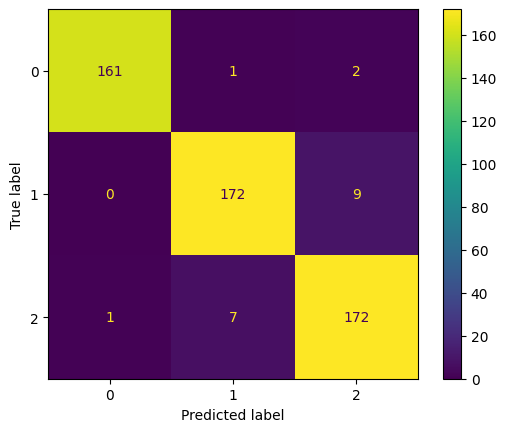

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

clf.fit(stack_array_train, y_train2)

y_pred = clf.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = clf.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)


print("---------")

from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=1)

lsvc.fit(stack_array_train, y_train2)

y_pred = lsvc.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = lsvc.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

print("---------")

import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(stack_array_train, y_train2)

y_pred = model.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = model.predict(stack_array_val)
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test2, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

In [ ]:
# vit 2.0 (128) + resnet (384)
import numpy as np

out_features_vit_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_vit_attention.npy')

out_features_vit_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_vit_attention.npy')

out_features_vit_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_vit_attention.npy')

from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 128)

pca.fit(out_features_vit_train)

PCA_out_features_vit_train = pca.transform(out_features_vit_train)

pca.fit(out_features_vit_test)

PCA_out_features_vit_test = pca.transform(out_features_vit_test)

pca.fit(out_features_vit_val)

PCA_out_features_vit_val = pca.transform(out_features_vit_val)


out_features_resnet_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_3rd_resnet_pred.npy')

out_features_resnet_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_3rd_resnet_pred.npy')

out_features_resnet_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_3rd_resnet_pred.npy')


from sklearn.decomposition import PCA  # to apply PCA
pca = PCA(n_components = 384)

pca.fit(out_features_resnet_train)

PCA_out_features_resnet_train = pca.transform(out_features_resnet_train)

pca.fit(out_features_resnet_test)

PCA_out_features_resnet_test = pca.transform(out_features_resnet_test)

pca.fit(out_features_resnet_val)

PCA_out_features_resnet_val = pca.transform(out_features_resnet_val)

stack_array_train = np.concatenate((PCA_out_features_vit_train,PCA_out_features_resnet_train), axis=1)

stack_array_test = np.concatenate((PCA_out_features_vit_test,PCA_out_features_resnet_test), axis=1)

stack_array_val = np.concatenate((PCA_out_features_vit_val,PCA_out_features_resnet_val), axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

clf.fit(stack_array_train, y_train2)

y_pred = clf.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits = 10))
# y_pred = clf.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)


print("---------")

from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=1)

lsvc.fit(stack_array_train, y_train2)

y_pred = lsvc.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = lsvc.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

print("---------")

import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(stack_array_train, y_train2)

y_pred = model.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred,digits = 10))
# y_pred = model.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

0.9638095238095238
              precision    recall  f1-score   support

           0  0.9818181818 0.9878048780 0.9848024316       164
           1  0.9767441860 0.9281767956 0.9518413598       181
           2  0.9361702128 0.9777777778 0.9565217391       180

    accuracy                      0.9638095238       525
   macro avg  0.9649108602 0.9645864838 0.9643885102       525
weighted avg  0.9644181291 0.9638095238 0.9637424723       525

---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9619047619047619
              precision    recall  f1-score   support

           0  0.9938271605 0.9817073171 0.9877300613       164
           1  0.9267015707 0.9779005525 0.9516129032       181
           2  0.9709302326 0.9277777778 0.9488636364       180

    accuracy                      0.9619047619       525
   macro avg  0.9638196546 0.9624618824 0.9627355336       525
weighted avg  0.9628344390 0.9619047619 0.9619526097       525

---------
0.9619047619047619
              precision    recall  f1-score   support

           0  0.9938271605 0.9817073171 0.9877300613       164
           1  0.9555555556 0.9502762431 0.9529085873       181
           2  0.9398907104 0.9555555556 0.9476584022       180

    accuracy                      0.9619047619       525
   macro avg  0.9630911421 0.9625130386 0.9627656836       525
weighted avg  0.9621400719 0.9619047619 0.9619860891       525



In [ ]:
# vit 2.0 (128) + resnet (384)
import numpy as np

out_features_vit_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/2048_train_vit_attention.npy')

out_features_vit_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/2048_test_vit_attention.npy')

out_features_vit_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/2048_val_vit_attention.npy')




out_features_resnet_train = np.load('/content/drive/MyDrive/output_data/Model_predictions/train_3rd_resnet_pred.npy')

out_features_resnet_test = np.load('/content/drive/MyDrive/output_data/Model_predictions/test_3rd_resnet_pred.npy')

out_features_resnet_val = np.load('/content/drive/MyDrive/output_data/Model_predictions/val_3rd_resnet_pred.npy')



stack_array_train = np.concatenate((out_features_vit_train,out_features_resnet_train), axis=1)

stack_array_test = np.concatenate((out_features_vit_test,out_features_resnet_test), axis=1)

stack_array_val = np.concatenate((out_features_vit_val,out_features_resnet_val), axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

clf.fit(stack_array_train, y_train2)

y_pred = clf.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = clf.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)


print("---------")

from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=1)

lsvc.fit(stack_array_train, y_train2)

y_pred = lsvc.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = lsvc.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

print("---------")

import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(stack_array_train, y_train2)

y_pred = model.predict(stack_array_test)

accuracy = accuracy_score(y_test2, y_pred)

print(accuracy)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred, digits=10))
# y_pred = model.predict(stack_array_val)

# accuracy = accuracy_score(y_val2, y_pred)

# print(accuracy)

0.96
              precision    recall  f1-score   support

           0  0.9878048780 0.9878048780 0.9878048780       164
           1  0.9555555556 0.9502762431 0.9529085873       181
           2  0.9392265193 0.9444444444 0.9418282548       180

    accuracy                      0.9600000000       525
   macro avg  0.9608623176 0.9608418552 0.9608472401       525
weighted avg  0.9600311029 0.9600000000 0.9600105527       525

---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9638095238095238
              precision    recall  f1-score   support

           0  0.9938650307 0.9878048780 0.9908256881       164
           1  0.9558011050 0.9558011050 0.9558011050       181
           2  0.9447513812 0.9500000000 0.9473684211       180

    accuracy                      0.9638095238       525
   macro avg  0.9648058390 0.9645353277 0.9646650714       525
weighted avg  0.9639030736 0.9638095238 0.9638509117       525

---------
0.9580952380952381
              precision    recall  f1-score   support

           0  0.9700598802 0.9878048780 0.9788519637       164
           1  0.9608938547 0.9502762431 0.9555555556       181
           2  0.9441340782 0.9388888889 0.9415041783       180

    accuracy                      0.9580952381       525
   macro avg  0.9583626044 0.9589900033 0.9586372325       525
weighted avg  0.9580109374 0.9580952381 0.9580152947       525



In [ ]:
out_features_vit_train.shape

(4181, 2048)

In [ ]:
out_features_resnet_train.shape

(4181, 2048)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#@title
clf = RandomForestClassifier()

#@title
clf.fit(stack_array_train, y_train2)

#@title
y_pred = clf.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = clf.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")

#@title
from sklearn.svm import LinearSVC

#@title
lsvc = LinearSVC(verbose=1)

#@title
lsvc.fit(stack_array_train, y_train2)

#@title
y_pred = lsvc.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

y_pred = lsvc.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)


print("---------")
#@title
import xgboost as xgb
model = xgb.XGBClassifier()

#@title
model.fit(stack_array_train, y_train2)

#@title
y_pred = model.predict(stack_array_test)

#@title
accuracy = accuracy_score(y_test2, y_pred)

#@title
print(accuracy)

#@title
y_pred = model.predict(stack_array_val)

#@title
accuracy = accuracy_score(y_val2, y_pred)

print(accuracy)

0.9676190476190476
0.9693486590038314
---------
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.96
0.9712643678160919
---------
0.9619047619047619
0.9655172413793104
